In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import kaepora as kpora
import kaepora_plot as kplot
import numpy as np
import spectral_analysis as sa

In [43]:
v_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 2 and ((dm15_source >= .9 and dm15_source < 1.3) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.3)) and v_at_max between -30 and -11",
           "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 2 and ((dm15_source >= .9 and dm15_source < 1.3) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.3)) and v_at_max > -11"]


In [44]:
composites, sn_arrays, boot_sn_arrays = kpora.make_composite(v_query, boot=True, medmean=1, verbose=False, gini_balance=True, combine=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 2 and ((dm15_source >= .9 and dm15_source < 1.3) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.3)) and v_at_max between -30 and -11
68 Total Spectra found
3 flagged spectra removed 65 spectra left
0 spectra of peculiar Ias removed 65 spectra left
62 spectra of SNe that have host reddening corrections
Arrays cleaned
62 spectra may have telluric contamination
31 total SNe
removed spectra of SNe with A_V > 2.0
Using 54 spectra of 28 SNe
Gini balancing...
Balanced after 12 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 2 and ((dm15_source >= .9 and dm15_source < 1.3) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.3)) and v_at_max > -11
75 Total Spectra found
3 flagged spectra removed 72 spectra left
0 spectra of peculiar Ias removed 72 spectr

Phase:  0.563552390193921
dm15:  1.150777851159606
Redshift:  0.01669620566955754
Morphology:  10.121072285965262
Phase:  0.58019900266905
dm15:  1.0782109750073143
Redshift:  0.009065274062599611
Morphology:  12.321942779282624


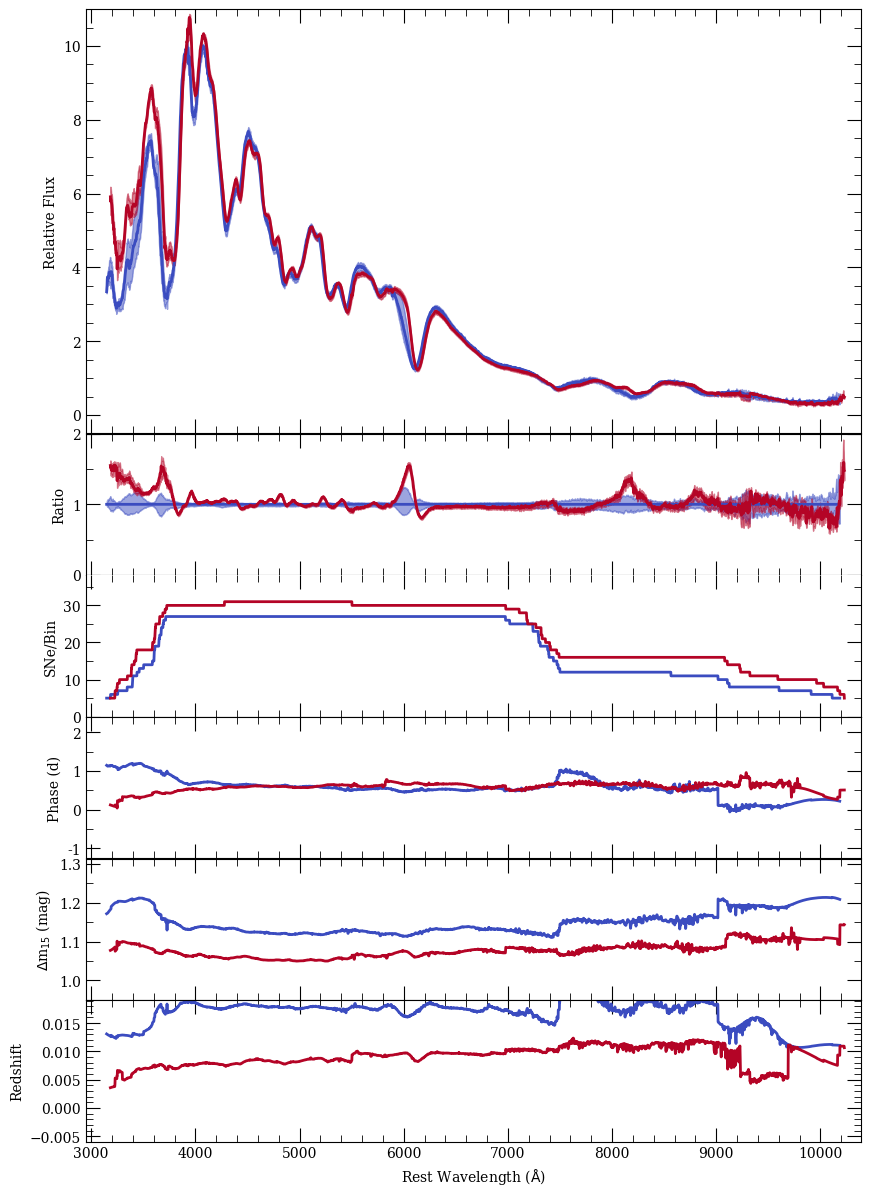

In [45]:
kpora.set_min_num_spec(composites, 5)
kplot.comparison_plot(composites, scale_type=False, min_num_show=5)

In [46]:
query_strings_highv = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max between -30 and -11"]
max_phase = 50.
p1 = -10.
k = 3.
p2 = p1+k
while p1 < max_phase:
    query_strings_highv.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max between -30 and -11"% (p1,p2))
    p1 += k
    p2 += k
for q in query_strings_highv:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max between -30 and -11
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max between -30 and -11
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -7.000000 and phase < -4.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max between -30 and -11
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -1.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max between -30 and -11
SELECT * from Spectra inner join Events ON Spec

In [47]:
query_strings_lowv = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max > -11"]
max_phase = 50.
p1 = -10.
k = 3.
p2 = p1+k
while p1 < max_phase:
    query_strings_lowv.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max > -11"% (p1,p2))
    p1 += k
    p2 += k
for q in query_strings_lowv:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max > -11
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max > -11
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -7.000000 and phase < -4.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max > -11
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -1.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max > -11
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1.000000 and phase < 2.

In [8]:
composites_lowv, sn_arrays_lowv, boot_sn_arrays_lowv = kpora.make_composite(query_strings_lowv, boot=True, medmean=1, verbose=False, gini_balance=True, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max > -11
29 Total Spectra found
1 flagged spectra removed 28 spectra left
0 spectra of peculiar Ias removed 28 spectra left
28 spectra of SNe that have host reddening corrections
Arrays cleaned
28 spectra may have telluric contamination
7 total SNe
removed spectra of SNe with A_V > 2.0
Using 28 spectra of 7 SNe
Gini balancing...
Balanced after 16 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max > -11
34 Total Spectra found
2 flagged spectra removed 32 spectra left
0 spectra of peculiar Ias removed 32 spectra left
24 spectra o

11 total SNe
removed spectra of SNe with A_V > 2.0
Using 17 spectra of 11 SNe
Gini balancing...
Balanced after 12 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 23.000000 and phase < 26.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max > -11
27 Total Spectra found
1 flagged spectra removed 26 spectra left
0 spectra of peculiar Ias removed 26 spectra left
25 spectra of SNe that have host reddening corrections
Arrays cleaned
25 spectra may have telluric contamination
15 total SNe
removed spectra of SNe with A_V > 2.0
Using 25 spectra of 15 SNe
Gini balancing...
Balanced after 8 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 26.000000 and phase < 29.000000 and ((dm15_source >= 1.0 and 

In [9]:
composites_highv, sn_arrays_highv, boot_sn_arrays_highv = kpora.make_composite(query_strings_highv, boot=True, medmean=1, verbose=False, gini_balance=True, combine=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max between -30 and -11
24 Total Spectra found
0 flagged spectra removed 24 spectra left
0 spectra of peculiar Ias removed 24 spectra left
24 spectra of SNe that have host reddening corrections
Arrays cleaned
24 spectra may have telluric contamination
10 total SNe
removed spectra of SNe with A_V > 2.0
Using 22 spectra of 9 SNe
Gini balancing...
Balanced after 4 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max between -30 and -11
51 Total Spectra found
0 flagged spectra removed 51 spectra left
0 spectra of peculiar Ias removed 

24 total SNe
removed spectra of SNe with A_V > 2.0
Using 33 spectra of 23 SNe
Gini balancing...
Balanced after 12 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 23.000000 and phase < 26.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and v_at_max between -30 and -11
34 Total Spectra found
3 flagged spectra removed 31 spectra left
0 spectra of peculiar Ias removed 31 spectra left
30 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
22 total SNe
removed spectra of SNe with A_V > 2.0
Using 24 spectra of 19 SNe
Gini balancing...
Balanced after 9 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 26.000000 and phase < 29.000000 and ((dm15_sourc

Phase:  -11.484212466385914
dm15:  1.131489862069673
Redshift:  0.00969554482789169
Morphology:  13.327614263354848
Phase:  -11.08770485193354
dm15:  1.0777198980630456
Redshift:  0.0064825995422072005
Morphology:  14.675584044877128


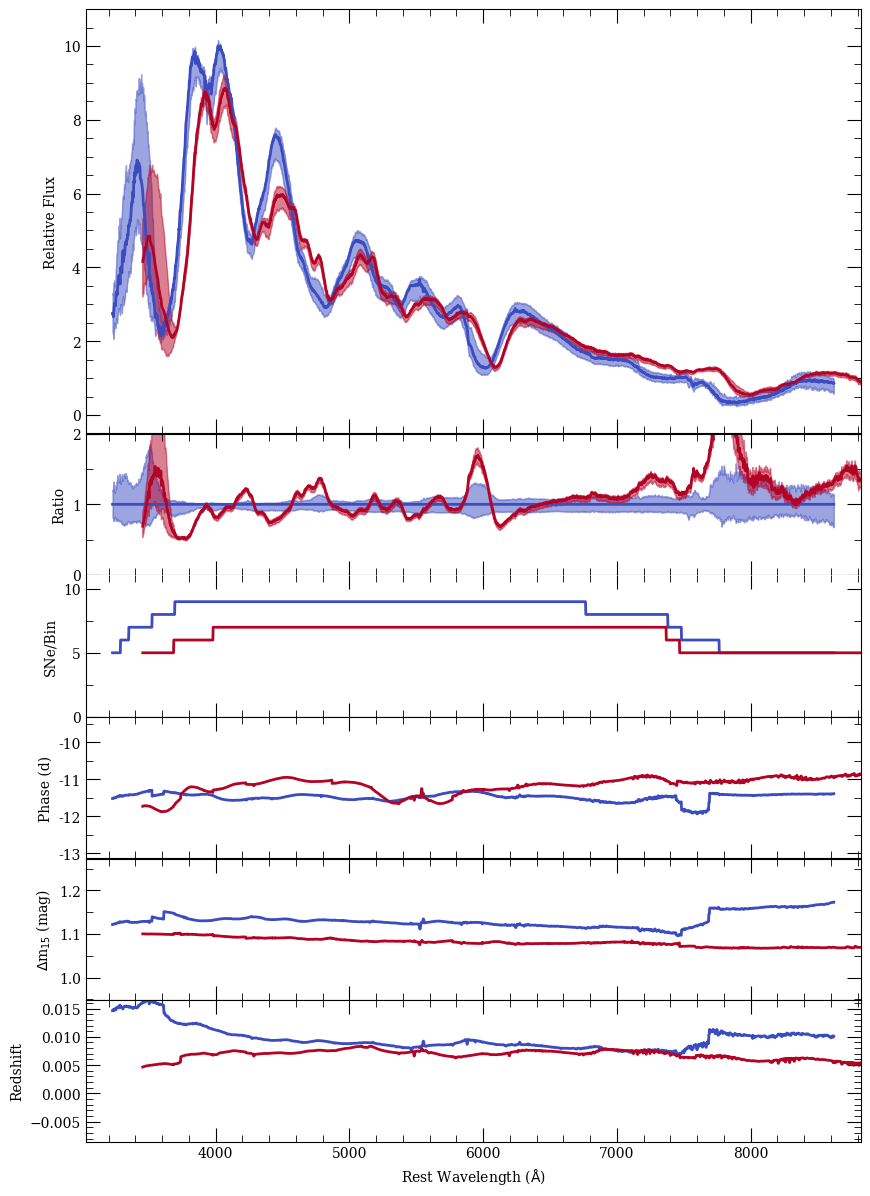

Phase:  -8.29955720923121
dm15:  1.113276740505129
Redshift:  0.00969469511019017
Morphology:  11.85840153537892
Phase:  -8.1836488277395
dm15:  1.095340671659653
Redshift:  0.005113677753656554
Morphology:  14.31831646837221


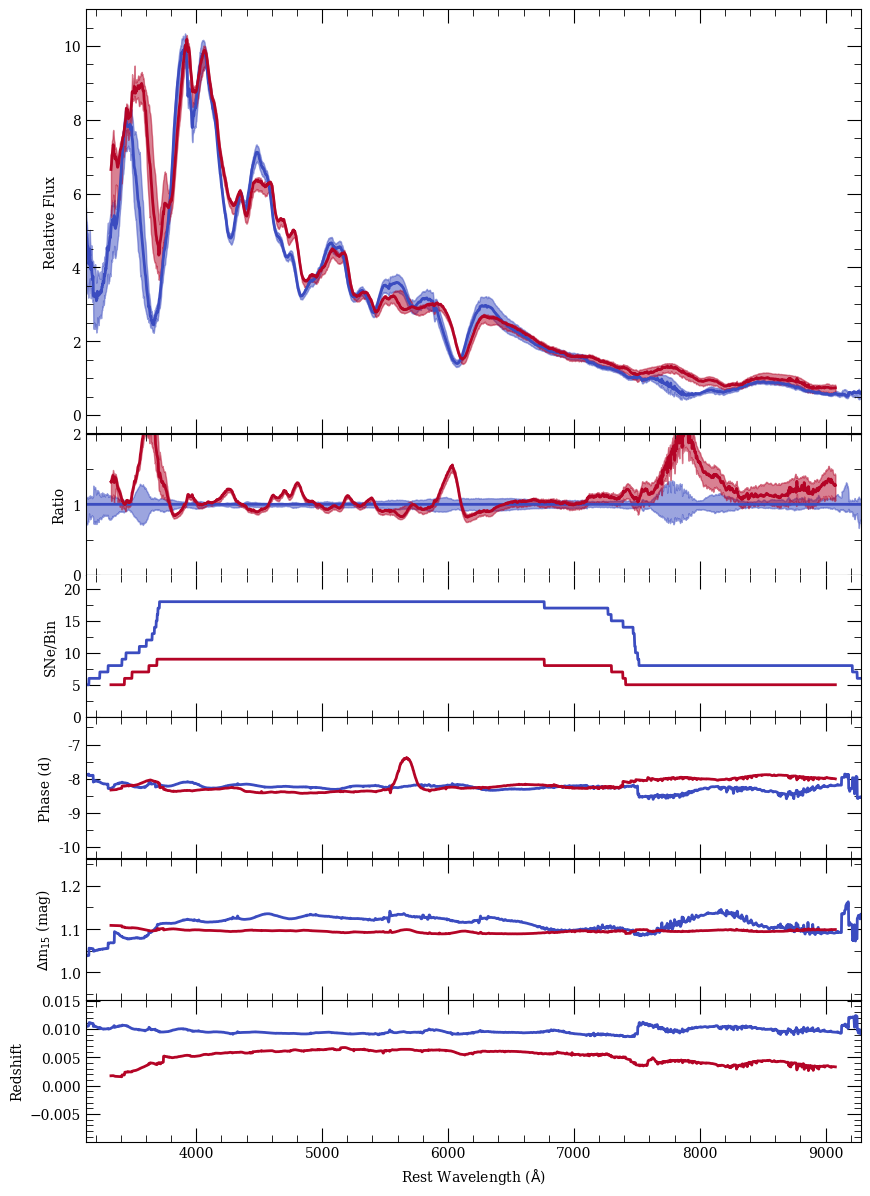

Phase:  -5.054056155997336
dm15:  1.116890949843941
Redshift:  0.012365346457988046
Morphology:  12.845070195235081
Phase:  -5.859902462936541
dm15:  1.1403125191954773
Redshift:  0.012350310135602234
Morphology:  11.291442606620233


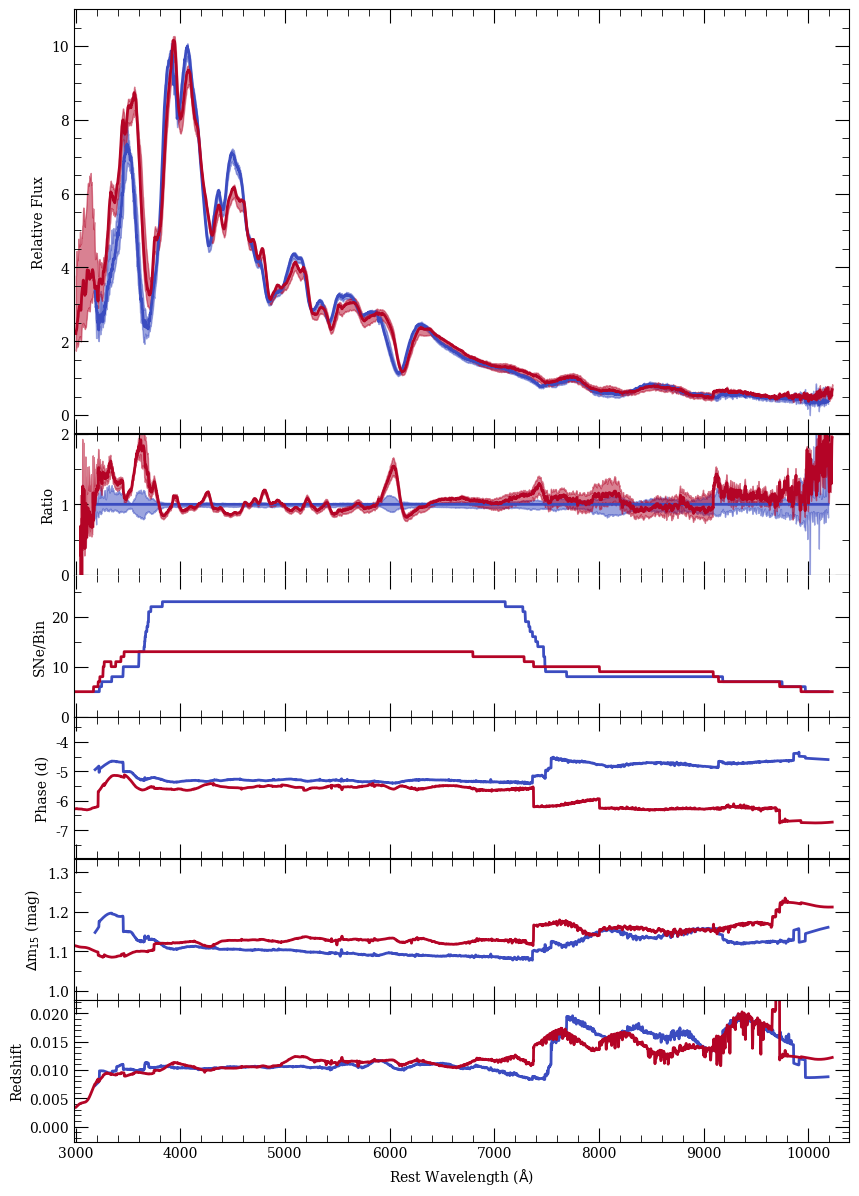

Phase:  -2.7145986334336234
dm15:  1.1162291607742094
Redshift:  0.013813242220068004
Morphology:  12.139488084054856
Phase:  -1.942083771119096
dm15:  1.1149705494867899
Redshift:  0.007637310106318075
Morphology:  12.905065010997733


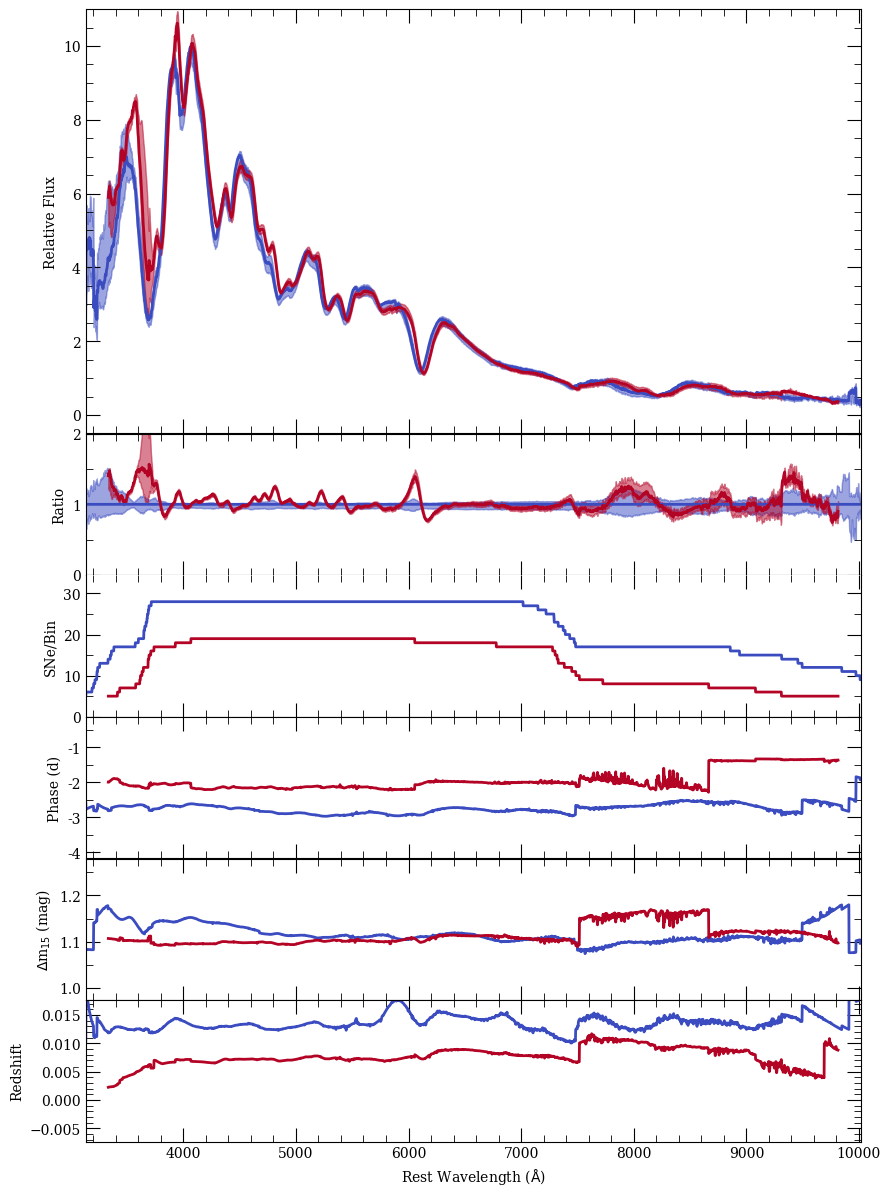

Phase:  0.5474932246191122
dm15:  1.1540773551360075
Redshift:  0.01638867640519389
Morphology:  9.926137249972212
Phase:  0.35442837328413335
dm15:  1.1238037544895592
Redshift:  0.008899061995304925
Morphology:  13.18796785470259


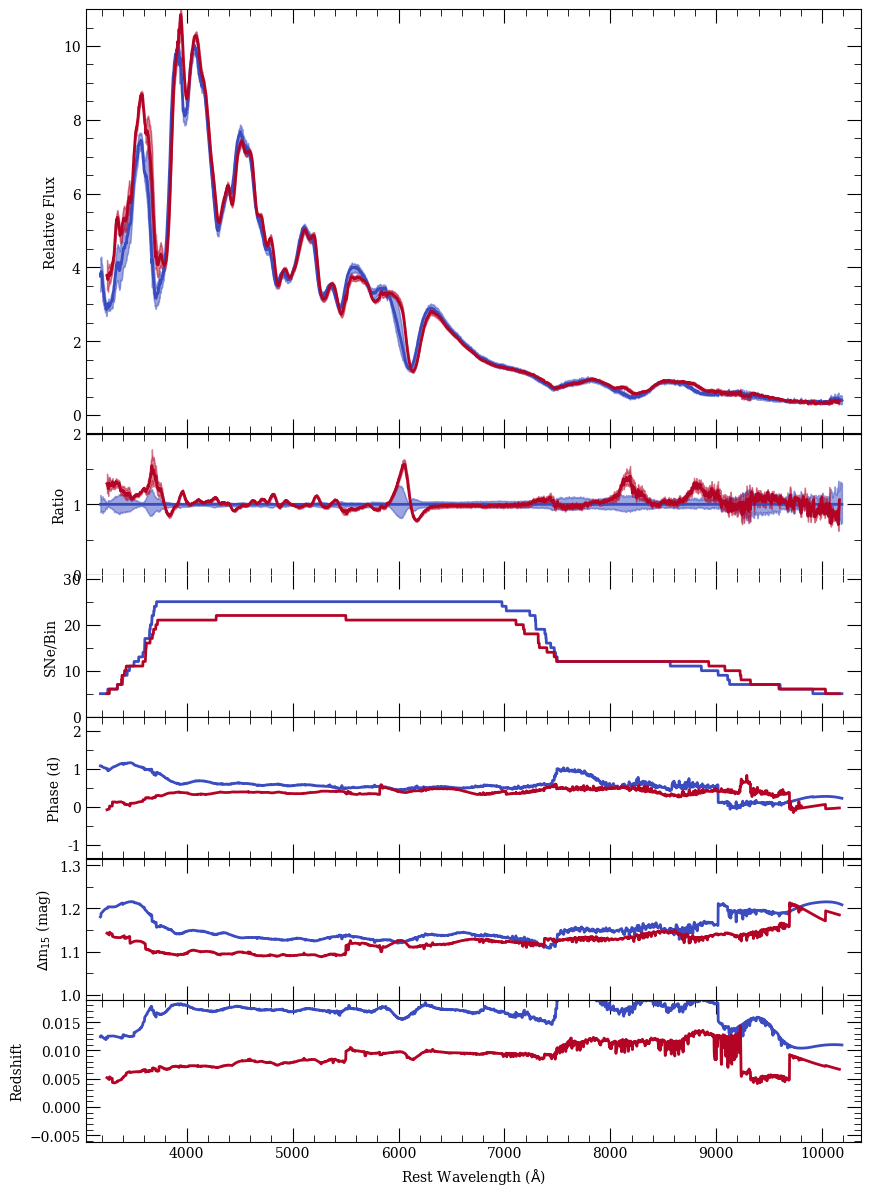

Phase:  3.555348504729184
dm15:  1.1314295782656594
Redshift:  0.014881891443426477
Morphology:  11.320935317103116
Phase:  3.523340045874582
dm15:  1.0989018083447821
Redshift:  0.00953089759309707
Morphology:  12.33192636672053


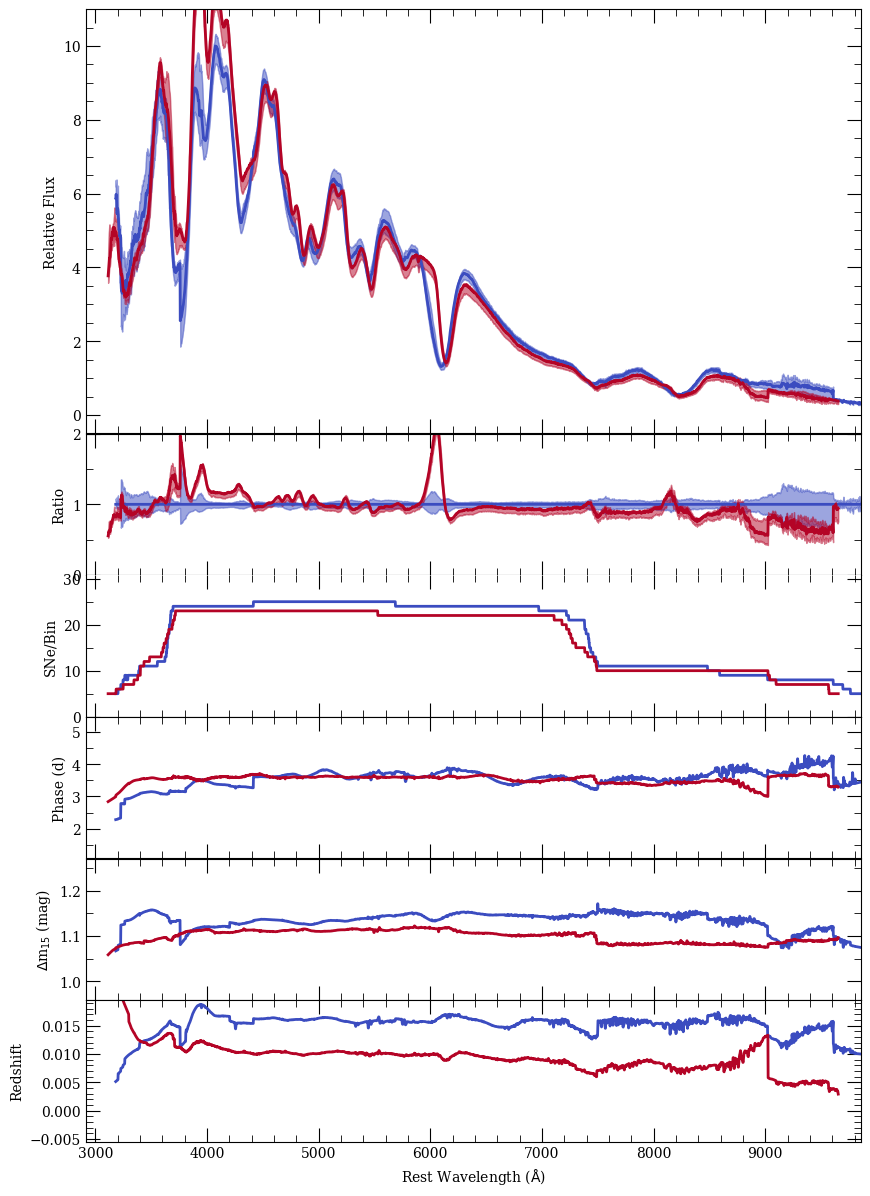

Phase:  6.468635675832308
dm15:  1.1442358314940577
Redshift:  0.015265129710647368
Morphology:  9.200096365192136
Phase:  6.354452458357998
dm15:  1.1037825351214392
Redshift:  0.011178844106827216
Morphology:  11.524317749334546


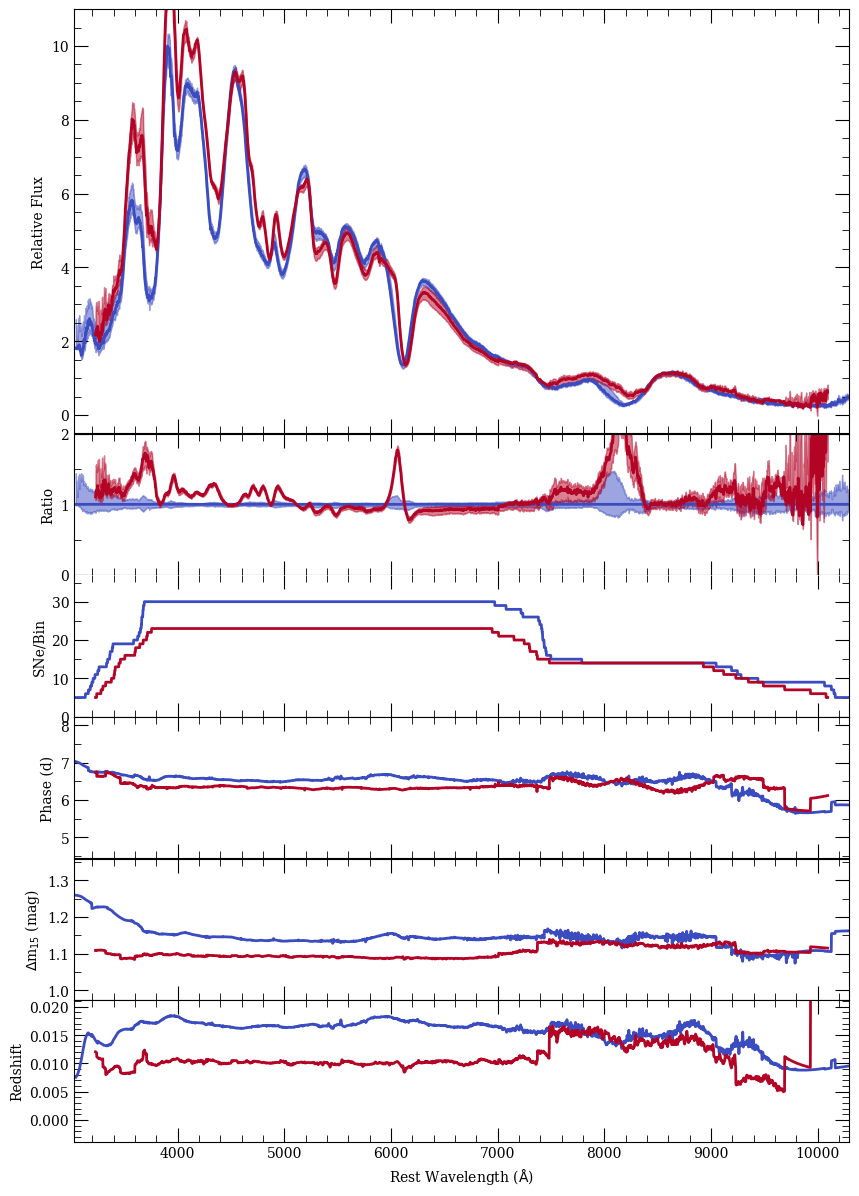

Phase:  9.384532112422107
dm15:  1.1265671437577276
Redshift:  0.013857161704928518
Morphology:  11.785244233133055
Phase:  9.203346708400781
dm15:  1.1218825976067983
Redshift:  0.009918925506844147
Morphology:  11.84200169546907


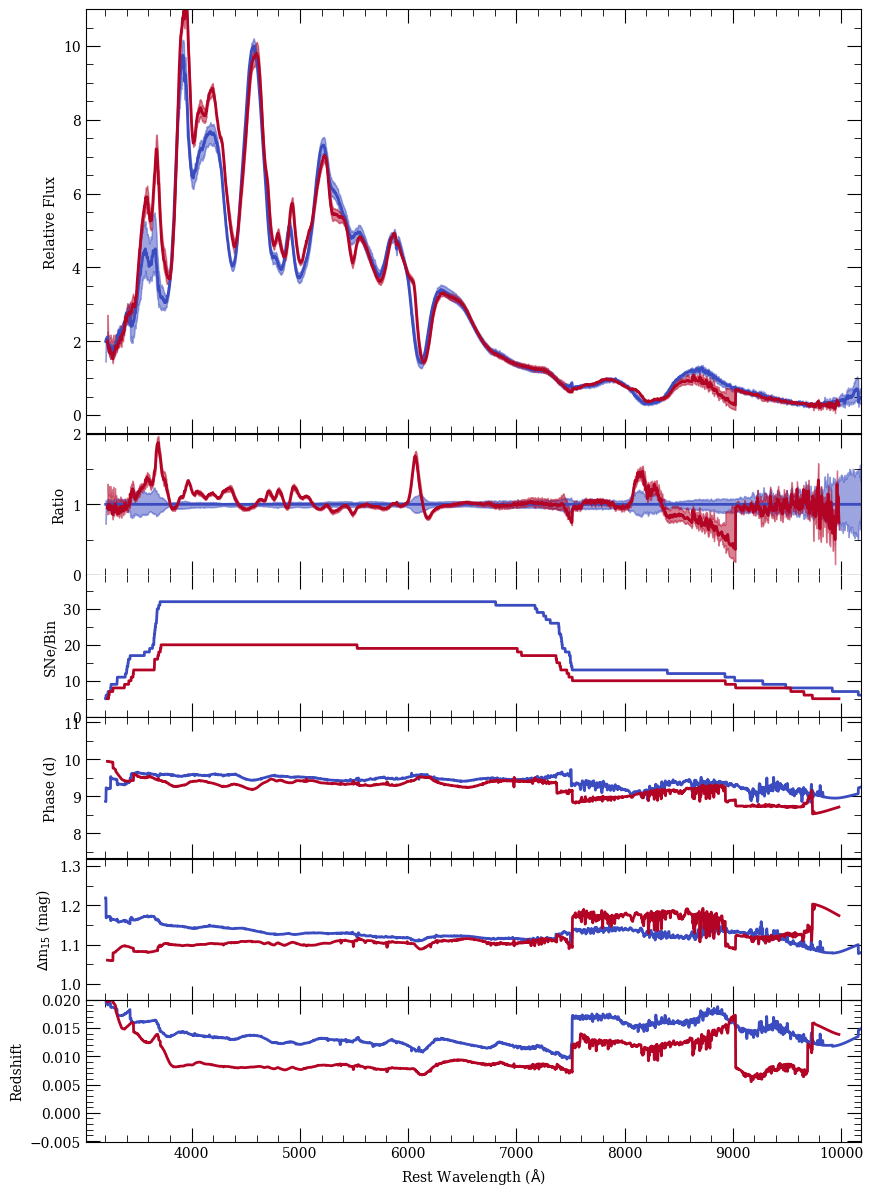

Phase:  12.580095229931551
dm15:  1.1300766228384806
Redshift:  0.015521841085866343
Morphology:  11.172730914122145
Phase:  12.153242620461727
dm15:  1.1062307441413268
Redshift:  0.007861103037269843
Morphology:  12.26685142830821


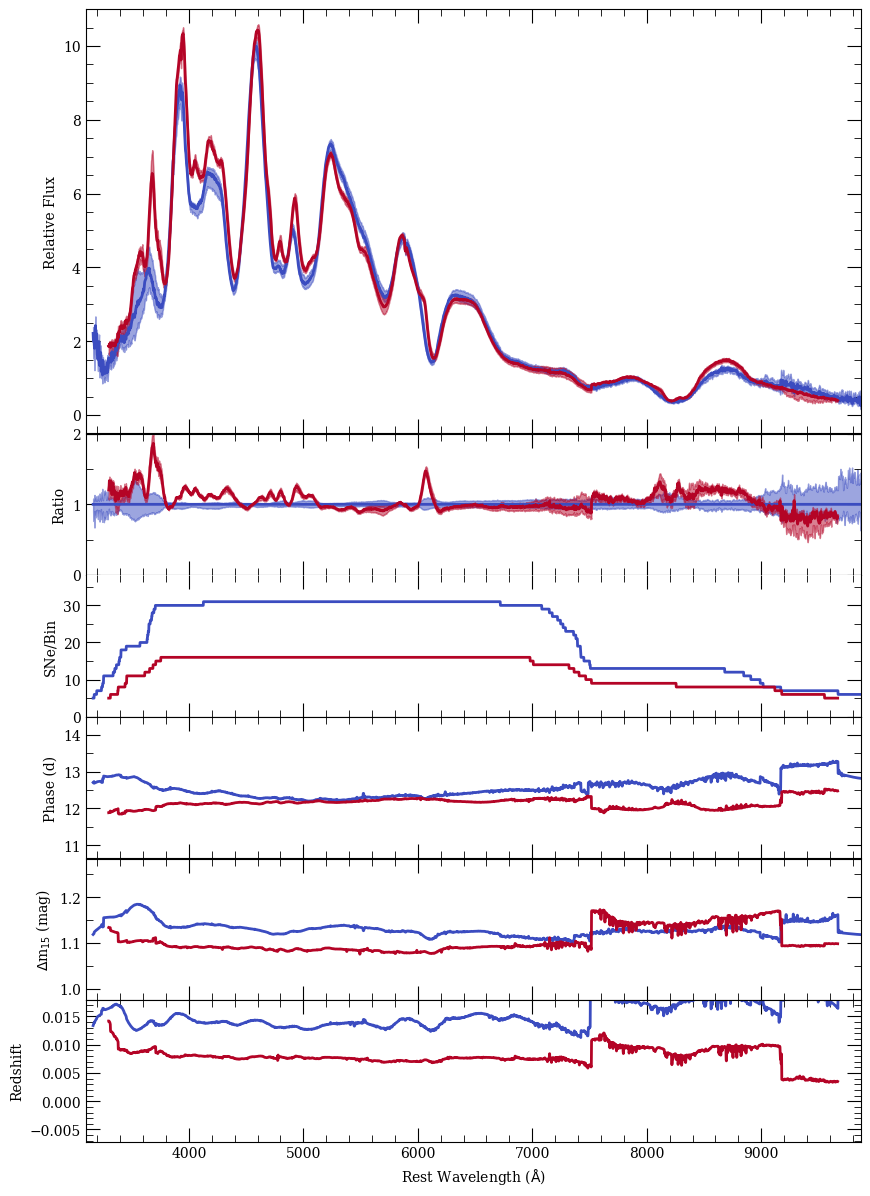

Phase:  15.295035822744882
dm15:  1.1332328551563229
Redshift:  0.013260191008579732
Morphology:  12.139127763981708
Phase:  15.631887749961555
dm15:  1.1129904544405405
Redshift:  0.012150848951357646
Morphology:  12.860062288771713


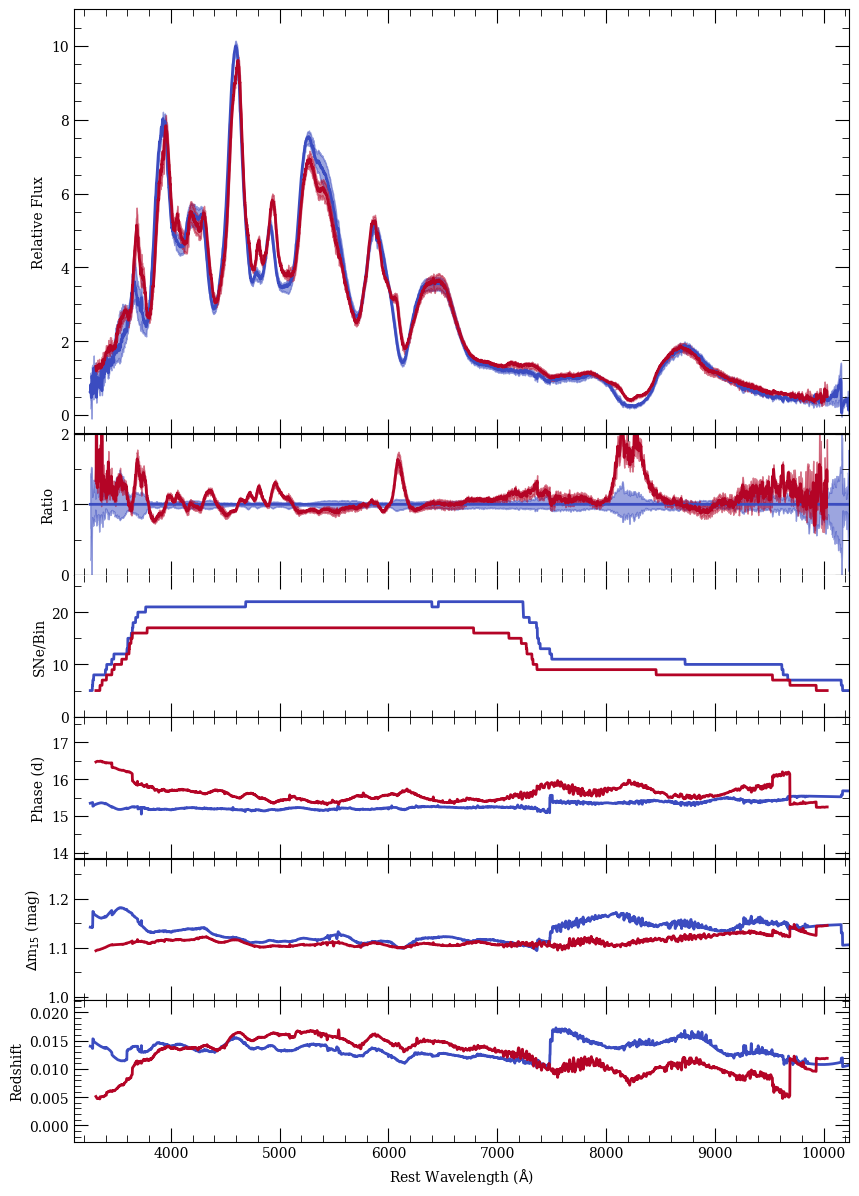

Phase:  18.521905840931204
dm15:  1.1054199104131013
Redshift:  0.014727279683546184
Morphology:  13.102709520577678
Phase:  18.49134791520447
dm15:  1.0939561947231287
Redshift:  0.011493002440582413
Morphology:  12.694535039953342


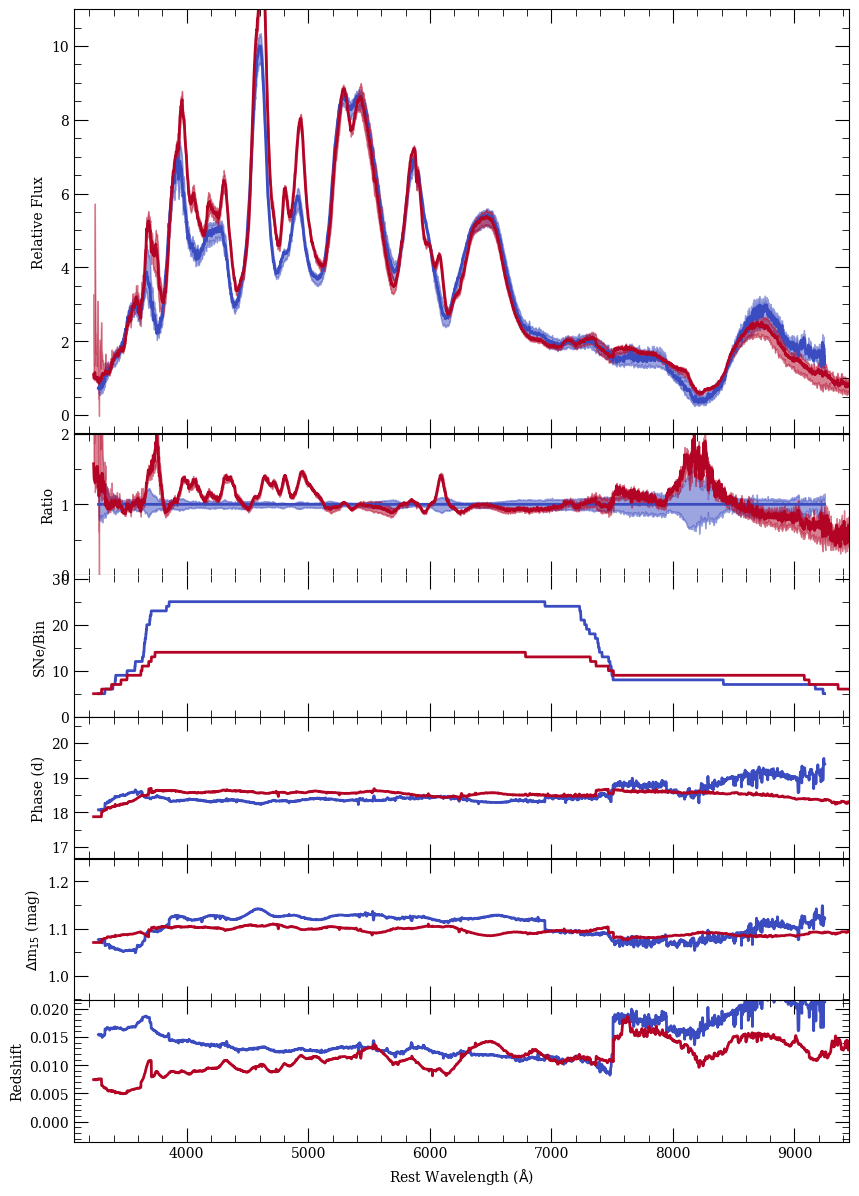

Phase:  21.27905644805503
dm15:  1.1315762144397505
Redshift:  0.013731966790942445
Morphology:  11.570925463948436
Phase:  21.002150605017206
dm15:  1.097235136979868
Redshift:  0.010995242808685704
Morphology:  12.244608115353104


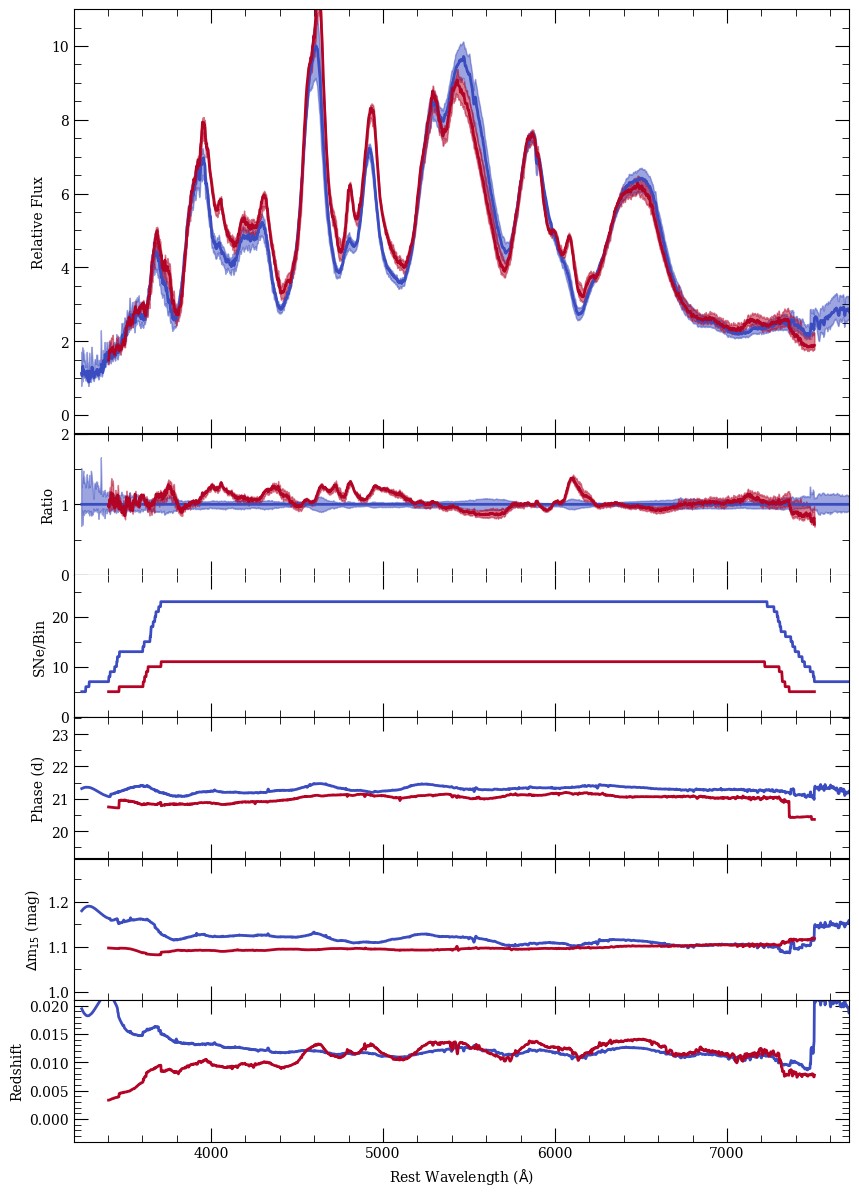

Phase:  24.653137204168313
dm15:  1.135800797671049
Redshift:  0.015755231604513226
Morphology:  12.781819785319758
Phase:  24.370600095204015
dm15:  1.1164119815620603
Redshift:  0.012632893703992934
Morphology:  11.711151748185921


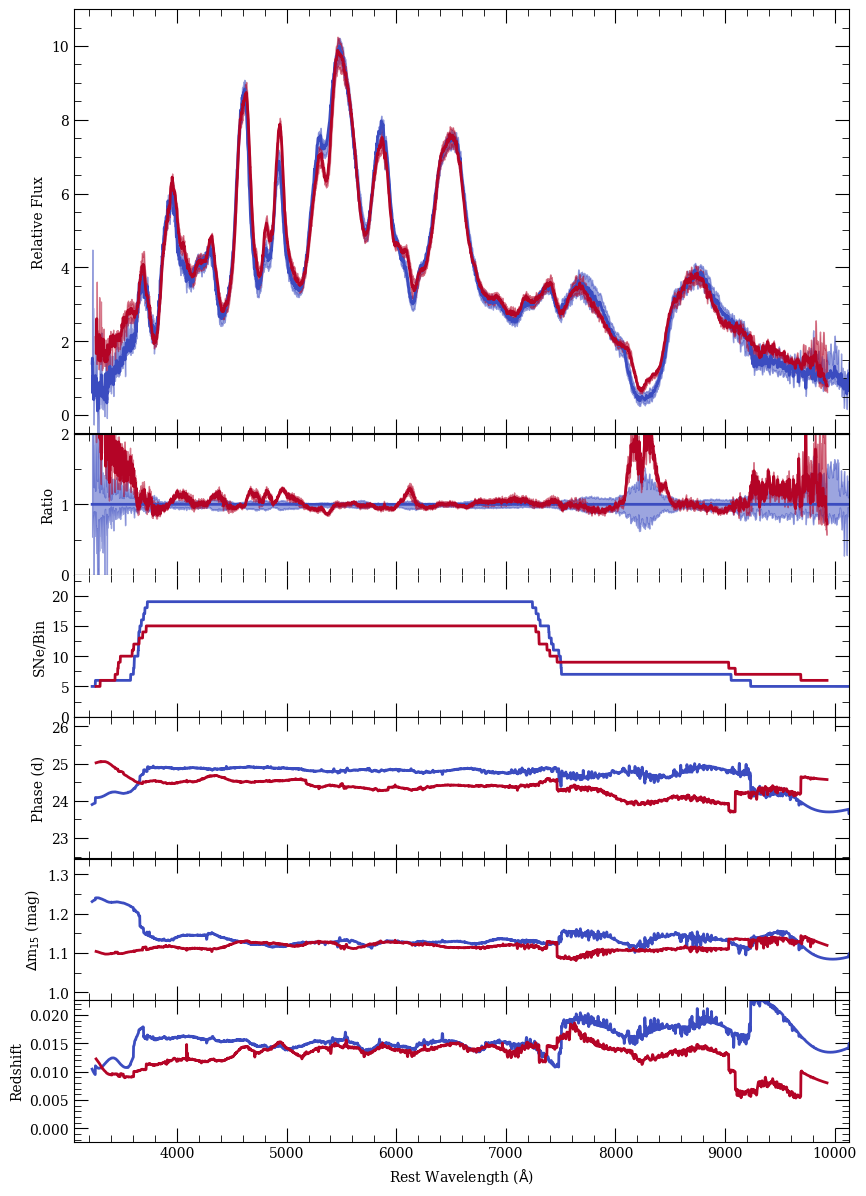

Phase:  27.481267159746853
dm15:  1.1302697916130433
Redshift:  0.01397503098087477
Morphology:  12.083826900919908
Phase:  27.3284283769237
dm15:  1.094030858769997
Redshift:  0.011877273747697382
Morphology:  12.015142169939775


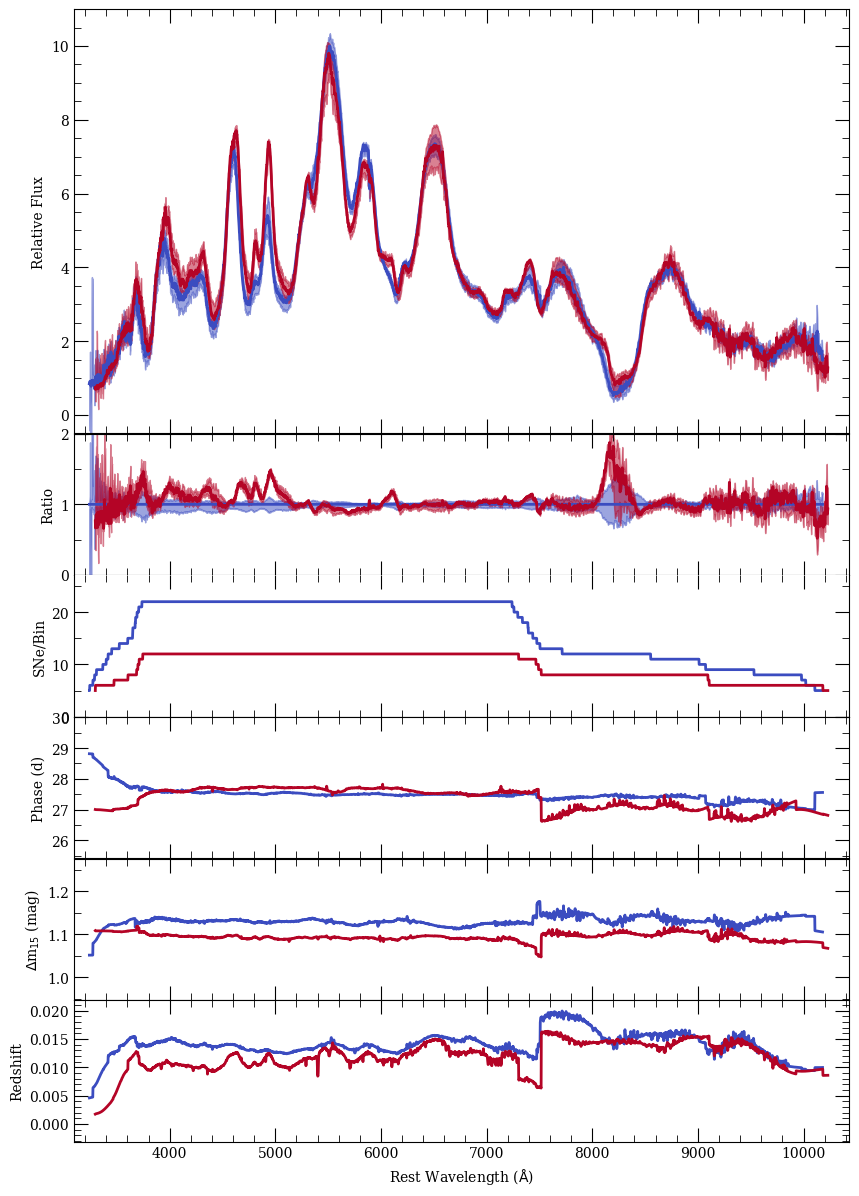

Phase:  30.299559017280252
dm15:  1.1731648655168851
Redshift:  0.015757095500394766
Morphology:  7.919391744780684
Phase:  30.445992991408737
dm15:  1.0998000801731456
Redshift:  0.01275389065741572
Morphology:  12.372967639299736


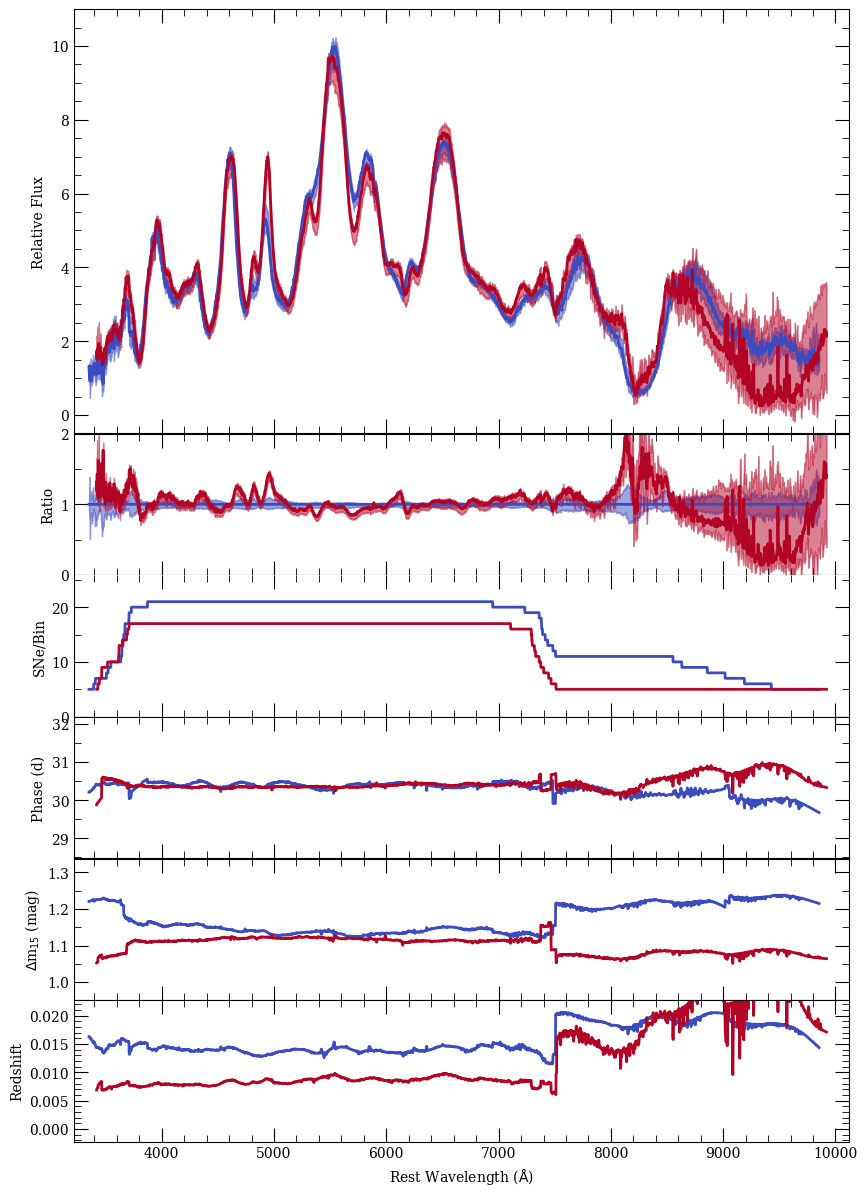

Phase:  33.60263431813513
dm15:  1.1345583825126715
Redshift:  0.018926420427461284
Morphology:  11.243704789684013
Phase:  33.46990505438041
dm15:  1.082012079270434
Redshift:  0.007864586994382573
Morphology:  13.249061568274534


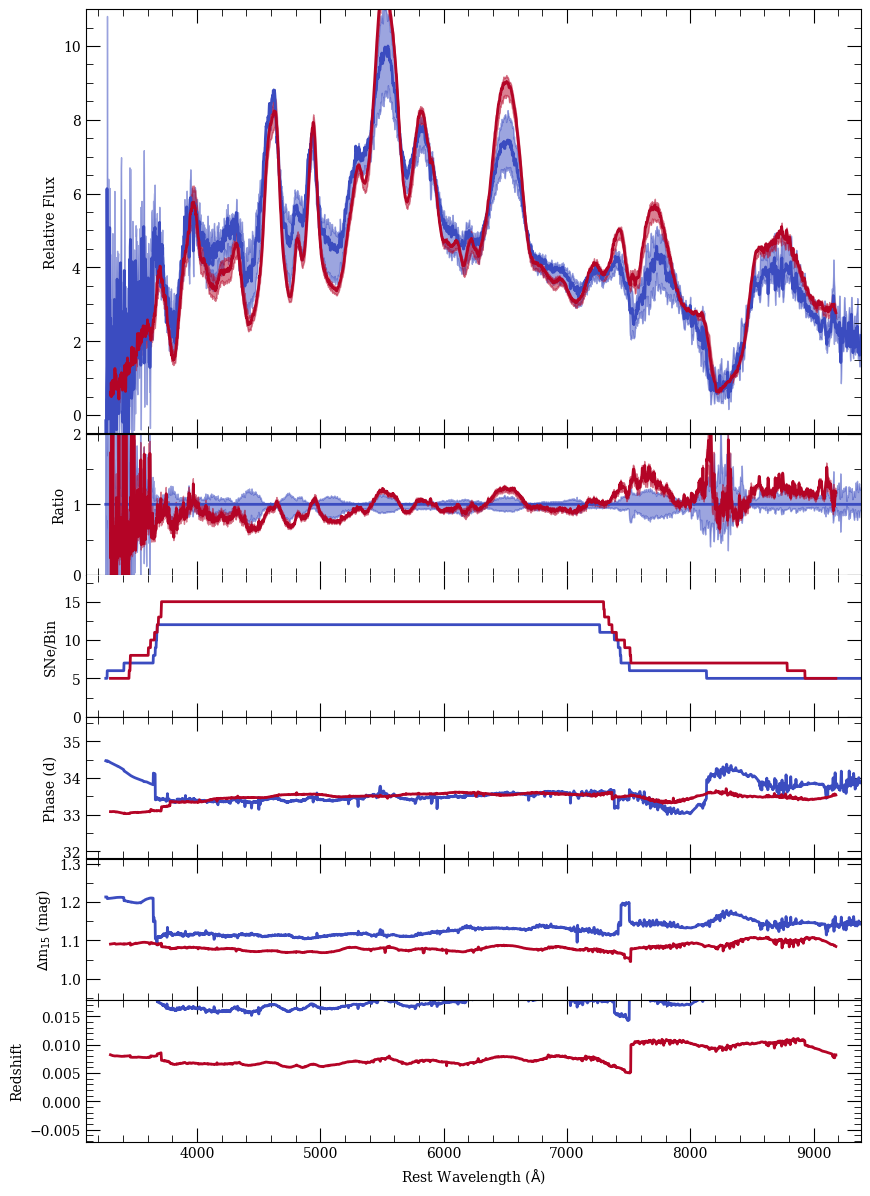

Phase:  35.89957955494029
dm15:  1.1516006023536831
Redshift:  0.017464113302382733
Morphology:  8.897605398222531
Phase:  36.193174779566874
dm15:  1.1012952189637923
Redshift:  0.006718474977635588
Morphology:  11.952104113334793


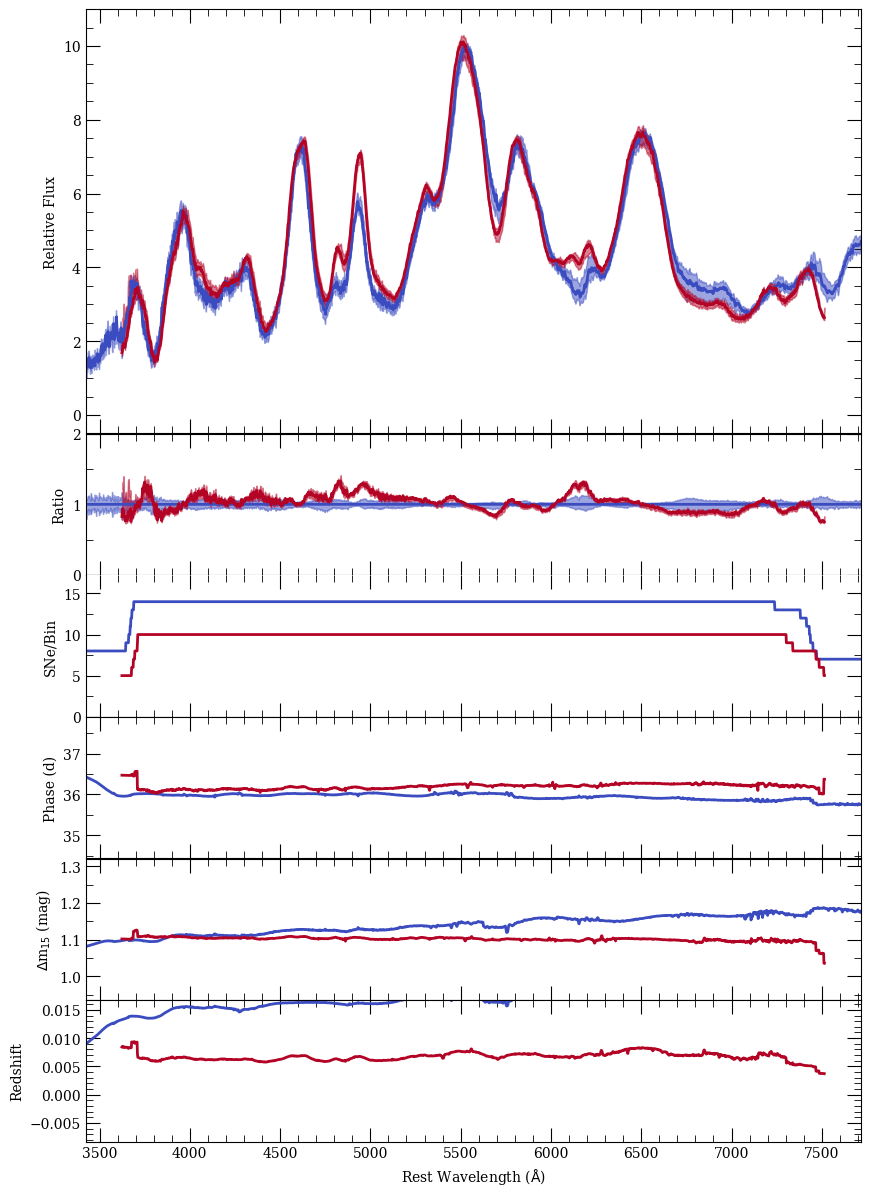

Phase:  39.27425027246639
dm15:  1.0875476649335514
Redshift:  0.011120455440641226
Morphology:  13.437668076106007
Phase:  39.32241758539539
dm15:  1.0829318337930147
Redshift:  0.006086536516027966
Morphology:  13.178822728561896


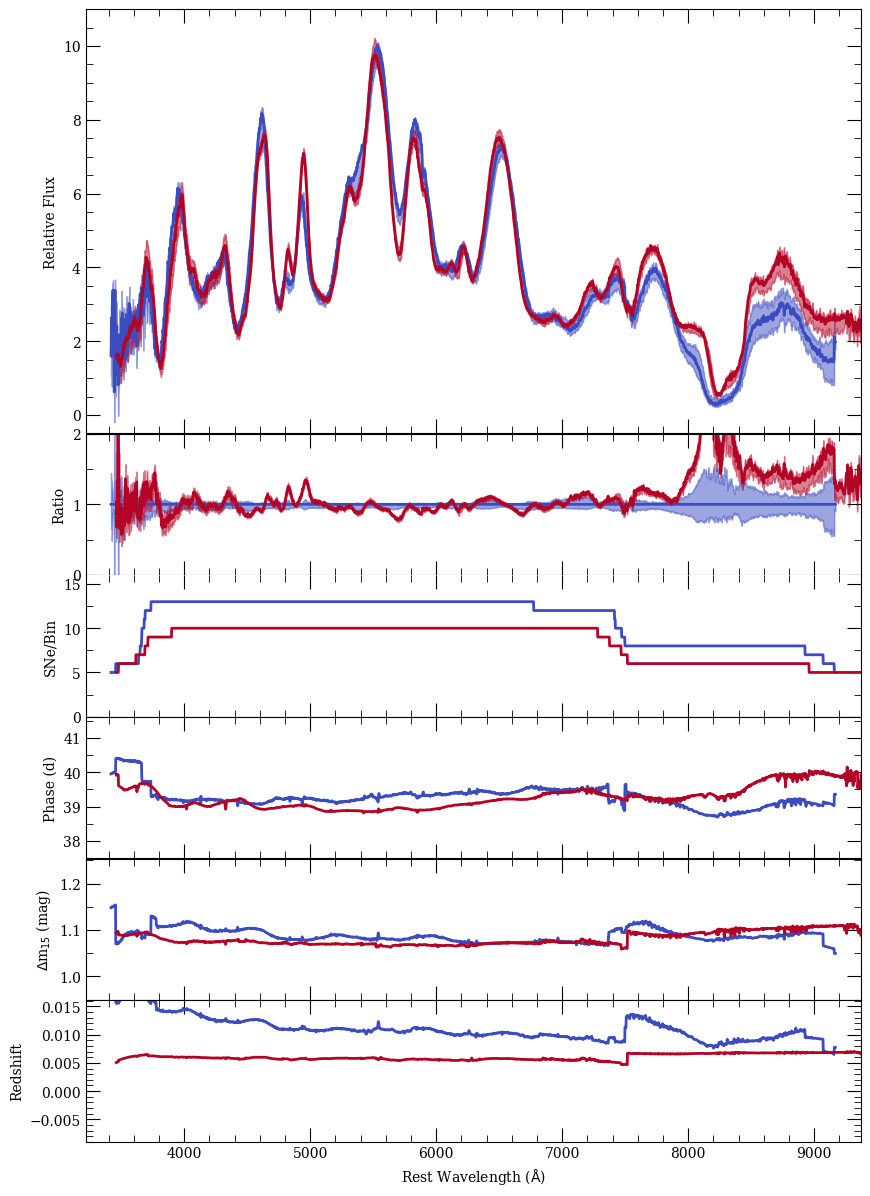

Phase:  42.66327941580389
dm15:  1.0825803558214886
Redshift:  0.013704085644749064
Morphology:  14.939580893834544
Phase:  42.33037044112931
dm15:  1.086398296694821
Redshift:  0.006642580310790186
Morphology:  11.687917366888643


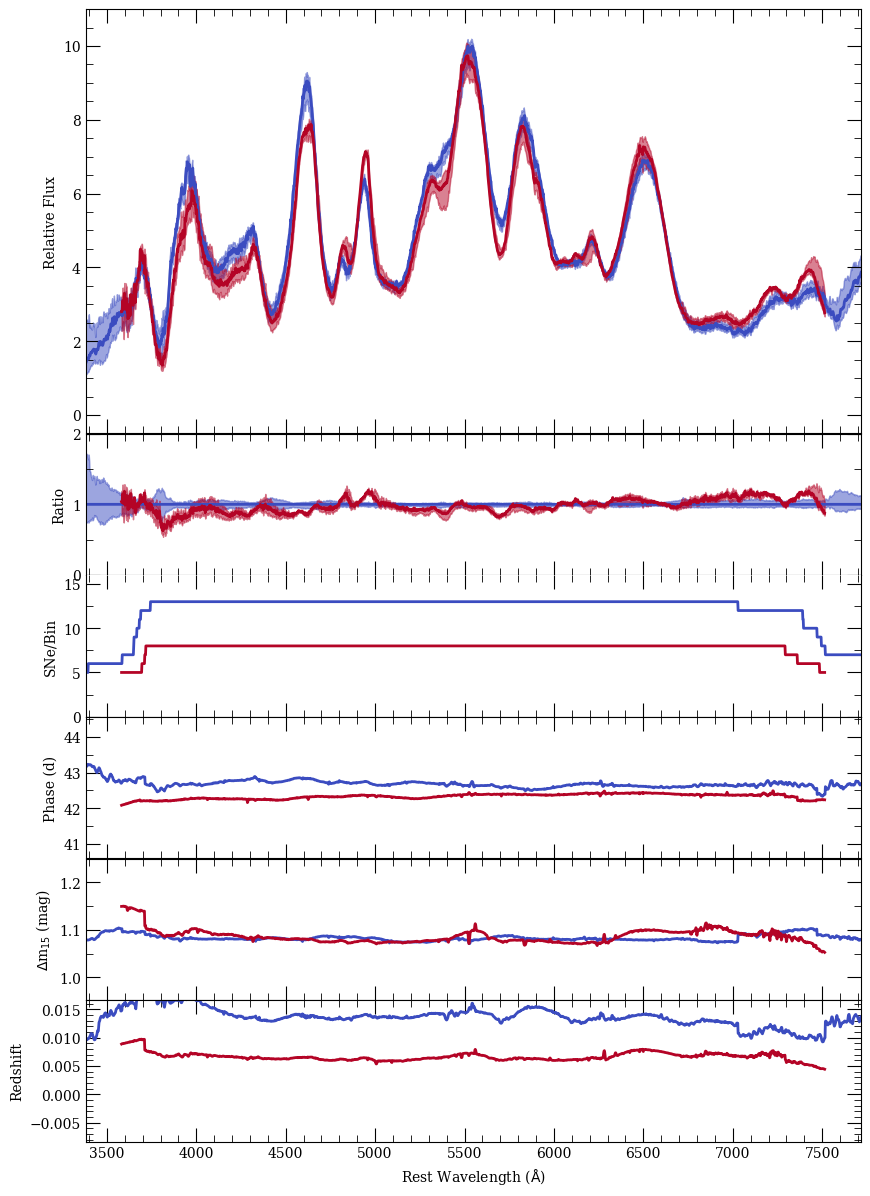

Phase:  45.174389884579014
dm15:  1.1446152055647287
Redshift:  0.011363850119780795
Morphology:  13.713138199313562
Phase:  44.93155651860695
dm15:  1.1079996892479504
Redshift:  0.009438675363855075
Morphology:  13.000347296748112


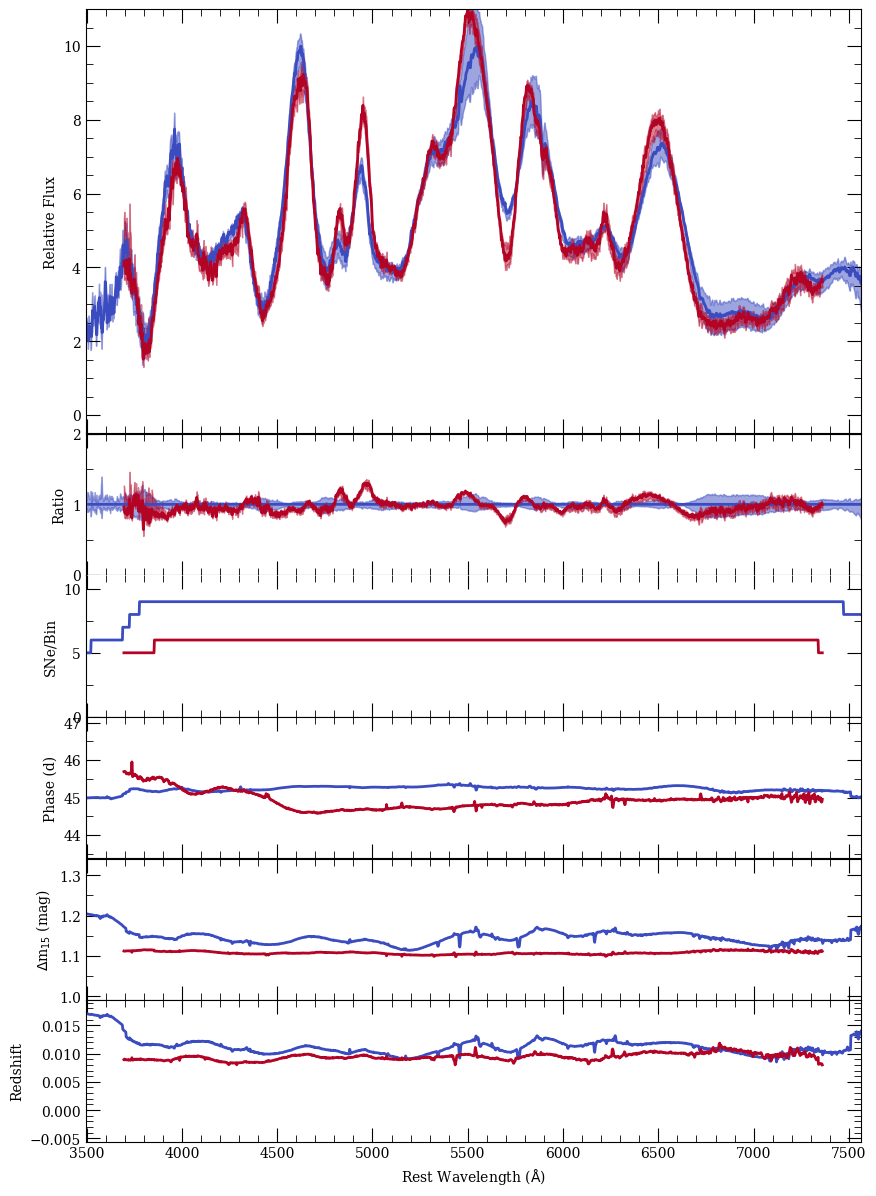

In [48]:
for i in range(len(composites_lowv)-1):
    comp_list = [composites_highv[i], composites_lowv[i]]
    kpora.set_min_num_spec(comp_list, 5)
    kplot.comparison_plot(comp_list, scale_type=False, min_num_show=5)

In [81]:
phases_lowv_1, comp_lowv_B_1, comp_lowv_V_1, errors_lowv_1 = sa.measure_comp_1m2(composites_lowv[0:-1], boot_arrs = boot_sn_arrays_lowv[0:-1], error=True)
phases_highv_1, comp_highv_B_1, comp_highv_V_1, errors_highv_1 = sa.measure_comp_1m2(composites_highv[0:-1], boot_arrs = boot_sn_arrays_highv[0:-1], error=True)


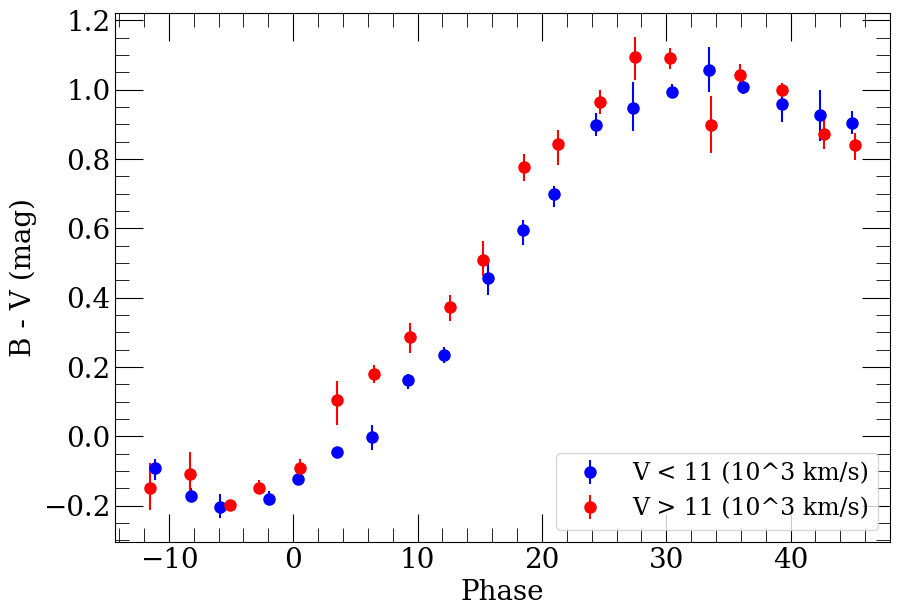

In [82]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Phase', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=10)
plt.errorbar(phases_lowv_1, np.asarray(comp_lowv_B_1)-np.asarray(comp_lowv_V_1), yerr=errors_lowv_1,fmt='o', markersize=8, color = 'blue', label='V < 11 (10^3 km/s)')
plt.errorbar(phases_highv_1, np.asarray(comp_highv_B_1)-np.asarray(comp_highv_V_1), yerr=errors_highv_1, fmt='o', markersize=8, color = 'red', label='V > 11 (10^3 km/s)')
plt.legend(loc=4, fontsize=17, numpoints=1)
# plt.savefig('../../Hubble_Residual_Paper/hr_color_curve.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [70]:
phases_lowv, comp_lowv_V, comp_lowv_i, errors_lowv = sa.measure_comp_1m2(composites_lowv[0:-1], filts = ['GROUND_JOHNSON_V','SDSS_i'], boot_arrs = boot_sn_arrays_lowv[0:-1], error=True)
phases_highv, comp_highv_V, comp_highv_i, errors_highv = sa.measure_comp_1m2(composites_highv[0:-1], filts = ['GROUND_JOHNSON_V','SDSS_i'], boot_arrs = boot_sn_arrays_highv[0:-1], error=True)


In [80]:
# for sn in sn_arrays_lowv[4]:
#     print sn.name, sn.v_at_max
# print 
# for sn in sn_arrays_highv[4]:
#     print sn.name, sn.v_at_max

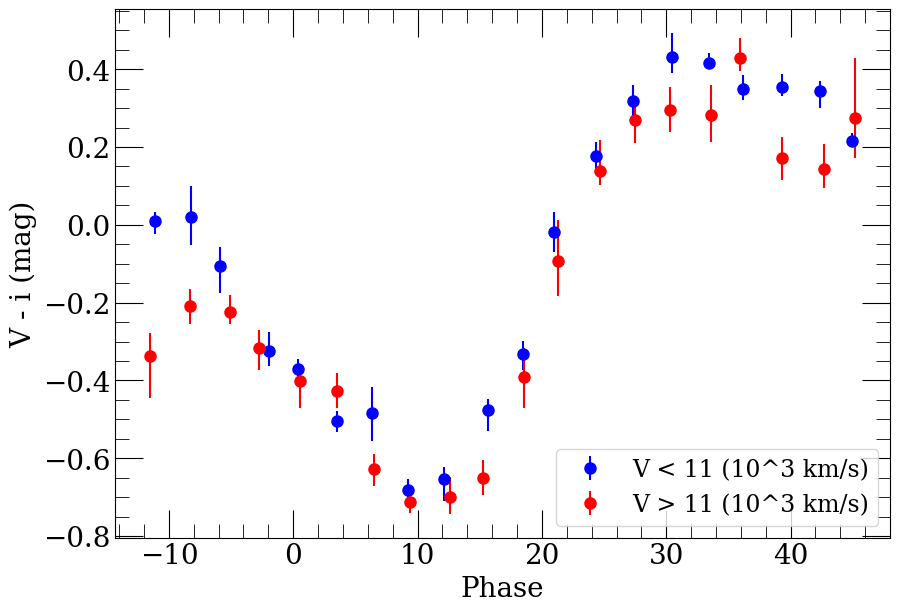

In [74]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Phase', fontsize = 20)
plt.ylabel('V - i (mag)', fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=10)
plt.errorbar(phases_lowv, np.asarray(comp_lowv_V)-np.asarray(comp_lowv_i), yerr=errors_lowv,fmt='o', markersize=8, color = 'blue', label='V < 11 (10^3 km/s)')
plt.errorbar(phases_highv, np.asarray(comp_highv_V)-np.asarray(comp_highv_i), yerr=errors_highv, fmt='o', markersize=8, color = 'red', label='V > 11 (10^3 km/s)')
plt.legend(loc=4, fontsize=17, numpoints=1)
# plt.savefig('../../Hubble_Residual_Paper/hr_color_curve.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [49]:
kpora.save_comps_to_files(composites_lowv[0:-1], 'SALT3_lowv', num_avg = 5, boot=True)
kpora.save_comps_to_files(composites_highv[0:-1], 'SALT3_highv', num_avg = 5, boot=True)

-11.09 1.08 0.006
../../David_Comps/SALT3_lowv_N=7_Nspec=28_phase=m11.09_dm15=1.08_z=0.006.txt
-8.18 1.1 0.005
../../David_Comps/SALT3_lowv_N=9_Nspec=24_phase=m8.18_dm15=1.1_z=0.005.txt
-5.86 1.14 0.012
../../David_Comps/SALT3_lowv_N=14_Nspec=33_phase=m5.86_dm15=1.14_z=0.012.txt
-1.94 1.11 0.008
../../David_Comps/SALT3_lowv_N=19_Nspec=43_phase=m1.94_dm15=1.11_z=0.008.txt
0.35 1.12 0.009
../../David_Comps/SALT3_lowv_N=22_Nspec=45_phase=p0.35_dm15=1.12_z=0.009.txt
3.52 1.1 0.01
../../David_Comps/SALT3_lowv_N=23_Nspec=56_phase=p3.52_dm15=1.1_z=0.01.txt
6.35 1.1 0.011
../../David_Comps/SALT3_lowv_N=23_Nspec=37_phase=p6.35_dm15=1.1_z=0.011.txt
9.2 1.12 0.01
../../David_Comps/SALT3_lowv_N=20_Nspec=30_phase=p9.2_dm15=1.12_z=0.01.txt
12.15 1.11 0.008
../../David_Comps/SALT3_lowv_N=16_Nspec=29_phase=p12.15_dm15=1.11_z=0.008.txt
15.63 1.11 0.012
../../David_Comps/SALT3_lowv_N=17_Nspec=26_phase=p15.63_dm15=1.11_z=0.012.txt
18.49 1.09 0.011
../../David_Comps/SALT3_lowv_N=14_Nspec=26_phase=p18.49_d

In [33]:
v_query = "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -1 and 1 and v_at_max > -40"
# v_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 2 and ((dm15_source >= .9 and dm15_source < 1.3) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.3)) and v_at_max > -11"]

In [40]:
spec_array = kpora.grab(v_query, multi_epoch=False, verbose=True)


166 Total Spectra found
109 spectra of SNe that have host reddening corrections
Arrays cleaned
Name Filename Source SNR Phase MJD MJD_max z Host Morphology Minwave Maxwave
1991bg sn1991bg-19911213-noz.flm bsnip 190.936993215 0.681687715271 48603.0 48602.316 0.003392 3.0 3342.0 8600.0
1994s sn1994s-19940616-uoi.flm bsnip 56.524322367 0.998840596273 49519.338 49518.324 0.015177 11.0 3126.0 11080.0
1998es sn1998es-19981125-ui-corrected.flm bsnip 173.128497131 0.496750833938 51142.252 51141.75 0.010567 8.0 3348.0 10042.0
1999aa sn1999aa-19990223-ui.flm bsnip 87.383415757 0.460351148368 51232.237 51231.77 0.014443 14.0 3346.0 10348.0
1999ac sn1999ac-19990312-ui-corrected.flm bsnip 184.483349779 -0.385339276873 51249.466 51249.855 0.0095 15.0 3298.0 10350.0
2000dn sn2000dn-20001006-uri-corrected.flm bsnip 31.1030531774 -0.845876955424 51823.327 51824.2 0.032065 8.0 3250.0 10026.0
2001cp sn2001cp-20010629-ui.flm bsnip 39.9997914207 0.917447344588 52089.422 52088.484 0.022402 13.0 3280.0 10122

1991bg -10.0393
1994s -10.7153
1998es -10.1984
1999aa -10.4412
1999ac -9.93407
2000dn -10.2088
2001cp -10.8796
2002cf -11.3549
2002de -11.4394
2002ha -11.2873
2002he -12.6181
2005ag -11.7513
2005eq -9.88943
2005lz -10.3582
2005na -10.7377
2006ej -11.8895
2006n -11.3228
2007a -10.8853
2007bc -10.4855
2007co -12.0247
2007hj -12.1791
2007o -9.95628
1994ae -10.9786
1994d -11.2373
1994t -13.4325
1995e -11.1568
1996x -11.1731
1997bp -15.6234
1997dt -11.33
1998aq -10.801
1998bp -11.0104
1998bu -10.9055
1998de -11.3029
1998dh -12.037
1998dx -11.8033
1998v -10.851
1999cc -12.0297
1999cl -12.4726
1999ej -10.6638
1999gp -11.3346
2000cp -11.7279
2000dg -10.8109
2000dk -11.1015
2001ay -14.7755
2001br -13.45
2001da -11.5274
2001eh -10.7001
2001ep -10.8007
2001fe -11.1475
2002aw -10.8468
2002cd -15.2751
2002ck -10.2898
2002cr -10.0536
2002fb -10.9227
2002hu -9.87507
2002jy -10.947
2003cg -11.3586
2003ch -10.9685
2003cq -11.6706
2003ic -11.9536
2003it -11.7187
2003iv -10.8901
2003kc -12.7437
2003u -11

(array([ 4.,  2.,  0.,  4.,  9., 30., 35., 19.,  5.,  1.]),
 array([-15.9693  , -15.181764, -14.394228, -13.606692, -12.819156,
        -12.03162 , -11.244084, -10.456548,  -9.669012,  -8.881476,
         -8.09394 ]),
 <a list of 10 Patch objects>)

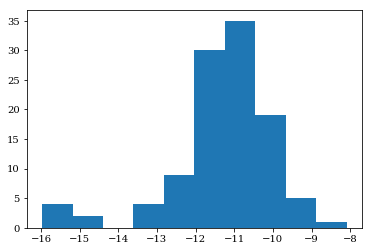

In [79]:
vs = []
for SN in spec_array:
    print SN.name, SN.v_at_max
    vs.append(SN.v_at_max)
plt.hist(vs)

In [31]:
for v in vs:
    print v

-10.5605
-9.37694
-11.9877
-10.0393
-12.8053
-9.62359
-13.2083
-10.9786
-11.2373
-10.7153
-13.0077
-10.3288
-11.1568
-10.8161
-15.6234
-11.5998
-9.60758
-13.3799
-12.01
-11.033
-10.801
-11.0104
-10.9055
-11.3029
-12.037
-11.0696
-11.8033
-12.4132
-13.262
-10.8113
-10.1984
-10.851
-10.4412
-9.93407
-10.1003
-12.4726
-11.146
-10.8317
-10.715
-10.0121
-10.754
-10.7787
-12.021
-11.3653
-12.2339
-11.7279
-11.5773
-10.5616
-10.8109
-11.1015
-11.2743
-10.2088
-11.8174
-14.7755
-11.4551
-10.6327
-10.5271
-12.5208
-13.45
-10.3669
-11.2673
-10.8796
-11.5274
-9.93402
-14.5113
-10.7001
-13.3187
-10.8007
-9.88352
-11.1475
-10.9183
-11.8452
-15.0052
-14.0566
-11.2021
-10.8468
-15.5161
-13.1142
-15.2751
-11.3549
-10.2898
-10.0536
-14.033
-12.5034
-11.4394
-13.6864
-11.2857
-11.0855
-11.5258
-11.911
-11.522
-10.9227
-10.008
-11.8438
-11.2873
-11.3276
-12.6181
-9.87507
-10.6725
-11.5452
-10.947
-11.9148
-11.6706
-10.5133
-10.1848
-12.5156
-10.6755
-10.7918
-10.8901
-12.7437
-11.2646
-11.3124
-14.6847
-

In [99]:
# late_color_check = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >=50 and phase <70 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and v_at_max > -12",
#                     "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >=50 and phase <70 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and v_at_max < -12"]
# # late_color_check = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >=63 and phase <80 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and si_v0 > -12000",
# #                     "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >=60 and phase <80 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and si_v0 < -12000"]
# composites_check, sn_arrays_check, boot_sn_arrays_check = kpora.make_composite(late_color_check, boot=False, medmean=1, verbose=False, gini_balance=True, combine=True)

In [100]:
# comp_list = [composites_check[0], composites_check[1]]
# kpora.set_min_num_spec(comp_list, 5)
# kplot.comparison_plot(comp_list, scale_type=False, min_num_show=5)

In [93]:
late_color_check_kyle = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >=50 and phase <70 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and si_v0 > -12000",
                         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >=50 and phase <70 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and si_v0 between -30000 and -12000"]

In [94]:
composites_check_kyle, sn_arrays_check_kyle, boot_sn_arrays_check_kyle = kpora.make_composite(late_color_check_kyle, boot=False, medmean=1, verbose=False, gini_balance=True, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >=50 and phase <70 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and si_v0 > -12000
57 Total Spectra found
1 flagged spectra removed 56 spectra left
0 spectra of peculiar Ias removed 56 spectra left
56 spectra of SNe that have host reddening corrections
Arrays cleaned
56 spectra may have telluric contamination
24 total SNe
removed spectra of SNe with A_V > 2.0
Using 55 spectra of 22 SNe
Gini balancing...
Balanced after 14 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >=50 and phase <70 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and si_v0 between -30000 and -12000
39 Total Spectra found
0 flagged spectra removed 39 spectra left
0 spectra of peculiar Ias removed 39 spectra left
39 spectra of SNe that have host reddening corrections
Arrays clean

Phase:  59.85173274831258
dm15:  1.1135824977107796
Redshift:  0.008989393874140899
HR:  0.04113671218440473
Phase:  58.647603175259604
dm15:  1.0887061724980982
Redshift:  0.013776274966417935
HR:  -0.11451385319599615


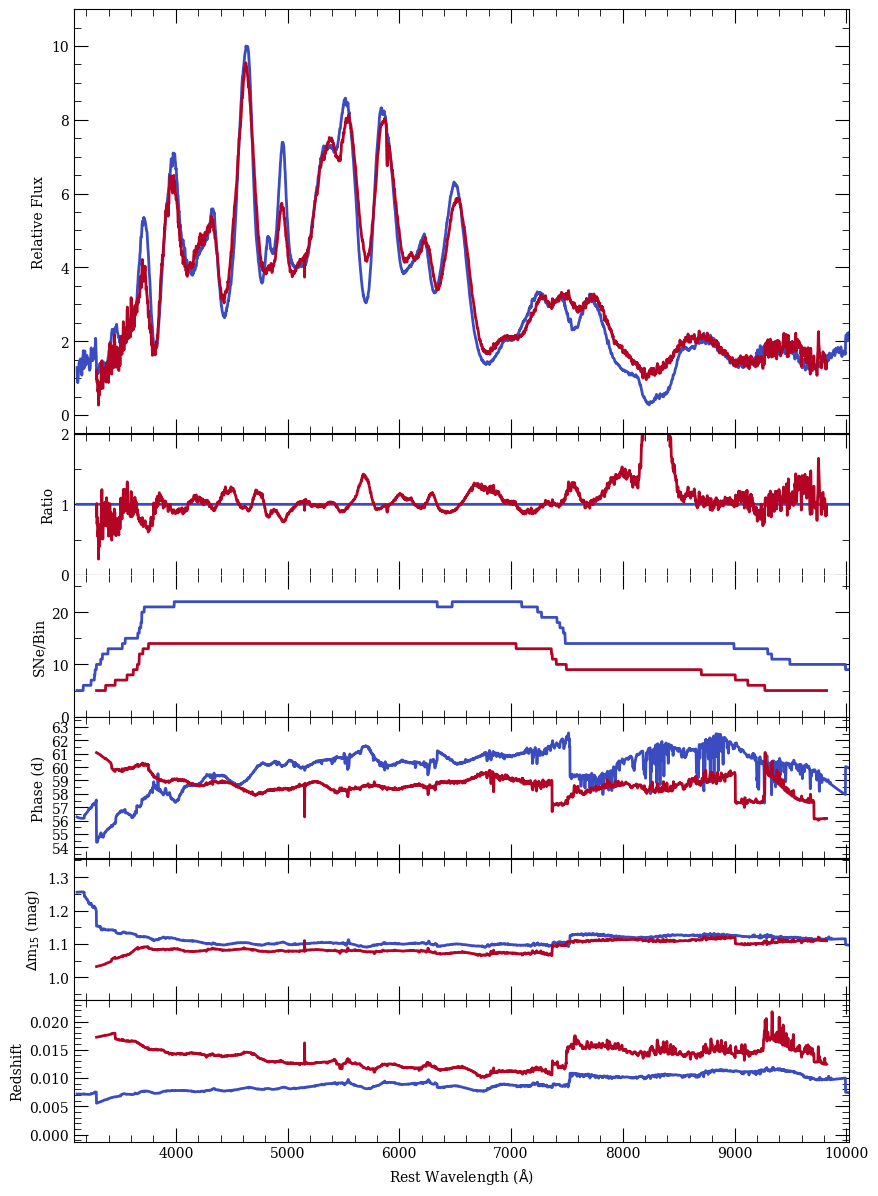

In [95]:
comp_list_kyle = [composites_check_kyle[0], composites_check_kyle[1]]
kpora.set_min_num_spec(comp_list_kyle, 5)
kplot.comparison_plot(comp_list_kyle, scale_type=False, min_num_show=5)

In [101]:
# comp_list_test = [composites_check[1], composites_check_kyle[1]]
# kpora.set_min_num_spec(comp_list_test, 5)
# kplot.comparison_plot(comp_list_test, scale_type=False, min_num_show=5)

In [98]:
for spec in sn_arrays_check[1]:
    print spec.name
print
for spec in sn_arrays_check_kyle[1]:
    print spec.name

2004dt_combined
2002bo_combined
2007co_combined
1997bp_combined
2007le_combined
2003w
2006ef
2002dj

2004dt_combined
2001g_combined
2005na_combined
2002bo_combined
1997bp_combined
2007le_combined
2003w
2006te
1995ak
1998dk
2005al
2006ef
2008c
2002dj
